<a href="https://colab.research.google.com/github/yannick5000/Fake-News-Detector-Covid-19-Vaccine/blob/main/Kopie_von_ML_DL_App_FakeNews_Techlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Health-related fakenews detector – Project Work - Machine Learning & Deep Learning Model**



#Importing the libraries and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/ColabNotebooks/data/

[Errno 2] No such file or directory: 'drive/MyDrive/ColabNotebooks/data/'
/content


In [ ]:
#Loading in data as dataframe
import pandas as pd
import string
import numpy as np
df = pd.read_csv("statements.csv",index_col="Index")

In [ ]:
#Removing punctuation from data frame
list_punctuation = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '–', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '®', '„', '“', '≥', '≤', '€','”']
def remove_punctuation_df(input):
  input = input.replace("[^\w\s]","")
  input = ["".join(letter for letter in word if letter not in string.punctuation)for word in input]
  input = [word.translate(string.punctuation) for word in input]
  input = ["".join(letter for letter in word if letter not in list_punctuation)for word in input]
  return input

In [ ]:
df["Statement"] = df[["Statement"]].apply(remove_punctuation_df)

In [ ]:
#Removing punctuation from user's sentence
other_punctuation = '–®„“≥≤€'
our_punctuation = string.punctuation + other_punctuation
def remove_punctuation_user(input):
  for character in our_punctuation:
    input = input.replace(character, '')
  return input

In [ ]:
example = "Der COVID-19-Impfstoff Spikevax® von Moderna ist jetzt in Europa für die Anwendung bei Kindern ab 6 Jahren zugelassen worden."
example = remove_punctuation_user(example)
print(example)

Der COVID19Impfstoff Spikevax von Moderna ist jetzt in Europa für die Anwendung bei Kindern ab 6 Jahren zugelassen worden


In [ ]:
#Setting target variable
df_drop = pd.get_dummies(df.iloc[:,0])
frames = [df_drop,df["True/False"]]
df_final = pd.concat(frames, axis=1)       
df_final 
df_final.tail()  
df_target = df["True/False"].eq(1).groupby(df["Statement"]).mean().reset_index()

In [ ]:
df_target

,Statement,True/False
0,An COVID würden fast nur diejenigen Menschen ...,False
1,Azithromycin kann das CovidVirus abtöten,False
2,Bleichmittel zu trinken um das Virus im Körpe...,False
3,Chloroquin kann das CovidVirus abtöten,False
4,Die COVID19 Impfung schützt nicht nur die gei...,True
...,...,...
952,mRNAImpfstoffe können unser Erbgut verändern,False
953,mRNAImpfstoffe verändern die DNA im Körper der...,False
954,okalreaktionen Schmerzen an der Einstichstelle...,True
955,Ähnlich wie bei Erwachsenen ist der Schutz vor...,True


#Preprocessing

In [ ]:
#Preprocessing for dataframe
def preprocess_df(input):
  input = input.apply(lambda x: x.lower())   #lower case
  input = input.apply(lambda x: x.strip())   #remove whitespace left and right
  return input

In [ ]:
df["Statement"] = df[["Statement"]].apply(preprocess_df)

In [ ]:
#Preprocessing for user's sentence
def preprocess_user(input):
  input = input.lower()   #lower case
  input = input.strip()   #remove whitespace left and right
  return input

In [ ]:
example = preprocess_user(example)
print(example)

der covid19impfstoff spikevax von moderna ist jetzt in europa für die anwendung bei kindern ab 6 jahren zugelassen worden


In [ ]:
#Tokenization: bringing sentences into world
import nltk
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Tokenization for dataframe
def tokenize_df(input):
  input = input.apply(lambda x: nltk.word_tokenize(x))
  return input

In [ ]:
df["Statement"] = df[["Statement"]].apply(tokenize_df)

In [ ]:
#Tokenization for user's sentence
def tokenize_user(input):
  input = nltk.word_tokenize(input)
  return input

In [ ]:
example = tokenize_user(example)
print(example)

['der', 'covid19impfstoff', 'spikevax', 'von', 'moderna', 'ist', 'jetzt', 'in', 'europa', 'für', 'die', 'anwendung', 'bei', 'kindern', 'ab', '6', 'jahren', 'zugelassen', 'worden']


In [ ]:
#Importing the stop words
#German stop word library from nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stopWordsGerman = stopwords.words("german")
len(stopWordsGerman)   #232 words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


232

In [ ]:
#Removing stop words in dataframe
def remove_stopwords_df(input):
  input = input.apply(lambda element: [word for word in element if not word in stopWordsGerman])
  input = input.apply(lambda x: ' '.join([word for word in x]))   #You can join the list of above words to create a sentence without stop words, as shown below:
  return input

In [ ]:
df["Statement"] = df[["Statement"]].apply(remove_stopwords_df)

In [ ]:
#Removing stop words in user's sentence
def remove_stopwords_user(input):
  new_list = list()
  for word in input:
    if not word in stopWordsGerman:
      new_list.append(word)
  sentence_withoutstopwords = ' '.join(new_list)
  return sentence_withoutstopwords

In [ ]:
example = remove_stopwords_user(example)
print(example)

covid19impfstoff spikevax moderna europa anwendung kindern ab 6 jahren zugelassen worden


In [ ]:
#Saving data after preprocessing part 1 as "cleanedstatements.csv"
from google.colab import files
df.to_csv('cleanedstatements.csv')
files.download('cleanedstatements.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Lemmatization

In [ ]:
#Lemmatization
#Preparation
!pip install -U spacy                       #to install spacy-lemmatizer
!python -m spacy download de_core_news_sm   #to download the German language module

import spacy
nlp = spacy.load("de_core_news_sm")

nlp.pipe_names   #to define specific lemmas yourself

ar = nlp.get_pipe('attribute_ruler')

#Phrases related to covid
ar.add([[{"TEXT":"vakzinen"}],[{"TEXT":"vakzine"}],[{"TEXT":"vaccination"}],[{"TEXT":"covid19impfung"}],[{"TEXT":"covidimpfung"}],[{"TEXT":"covid19schutzimpfung"}],[{"TEXT":"covidschutzimpfung"}],[{"TEXT":"coronaschutzimpfung"}]],{"LEMMA":"impfung"})
ar.add([[{"TEXT":"impfstoffe"}],[{"TEXT":"impfstoffen"}]],{"LEMMA":"impfstoff"})
ar.add([[{"TEXT":"covid19"}],[{"TEXT":"sarscov2"}]],{"LEMMA":"corona"})
ar.add([[{"TEXT":"coronaerkrankung"}],[{"TEXT":"coronainfektion"}],[{"TEXT":"covid19infektion"}],[{"TEXT":"sarscov2infektion"}]],{"LEMMA":"corona"})
ar.add([[{"TEXT":"covid19virus"}],[{"TEXT":"sarscov2virus"}], [{"TEXT":"coronaviren"}]], {"LEMMA":"coronavirus"})
ar.add([[{"TEXT":"covid19impfstoff"}],[{"TEXT":"covidimpfstoffe"}],[{"TEXT":"covidimpfstoffe"}]],{"LEMMA":"coronaimpfstoff"})
ar.add([[{"TEXT":"covid19auffrischimpfung"}],[{"TEXT":"covidauffrischimpfung"}],[{"TEXT":"coronaauffrischimpfung"}],[{"TEXT":"auffrischungsimpfung"}],[{"TEXT":"covid19auffrischungsimpfung"}],[{"TEXT":"covidiauffrischungsimpfung"}],[{"TEXT":"coronaauffrischungsimpfung"}]],{"LEMMA":"auffrischimpfung"})

#Other phrases
ar.add([[{"TEXT":"altersgruppe"}]],{"LEMMA":"altersklasse"})
ar.add([[{"TEXT":"myokarditis"}],[{"TEXT":"myokarditiden"}]],{"LEMMA":"herzmuskelentzündung"})
ar.add([[{"TEXT":"todesfälle"}],[{"TEXT":"sterbefall"}],[{"TEXT":"sterbefälle"}],[{"TEXT":"sterberate"}],[{"TEXT":"todesrate"}]],{"LEMMA":"todesfall"})
ar.add([[{"TEXT":"fehlgeburten"}],[{"TEXT":"spontanabort"}],[{"TEXT":"fehlgeburt"}],[{"TEXT":"stillgeburt"}],[{"TEXT":"totgeburt"}]],{"LEMMA":"fehlgeburt"})


In [ ]:
df = pd.read_csv("cleanedstatements.csv", index_col='Index')

In [ ]:
def lemmatize_df(input):
  lemmtext = []
  doc = nlp(input)
  input = [x.lemma_ for x in doc]
  lemmtext.append(input)
  input = ' '.join([word for word in input])
  input = input.lower()   #Through lemmatization, words with capital letters reappeared, so make everything lower case again
  return input

In [ ]:
df["Statement"] = df["Statement"].apply(lemmatize_df)

In [ ]:
def lemmatize_user(input):
  lemmtext = []
  doc = nlp(input)
  input = [x.lemma_ for x in doc]
  lemmtext.append(input)
  input = ' '.join(input)
  input = input.lower()   #Through lemmatization, words with capital letters reappeared, so make everything lower case again
  return input

In [ ]:
example = lemmatize_user(example)
print(example)

coronaimpfstoff spikevax moderna europa anwendung kind ab 6 jahr zulassen werden


In [ ]:
#Saving data after lemmatization part 1 as "lemmatizedstatements.csv"
from google.colab import files
df.to_csv('lemmatizedstatements.csv')
files.download('lemmatizedstatements.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Machine Learning Model: Logistic Regression

In [ ]:
#Preparing fake news detector: training model with data

In [ ]:
#Following code is from: https://www.kaggle.com/code/shahkan/text-classification-using-logistic-regression/data
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('lemmatizedstatements.csv')

In [ ]:
#Stopwords are the same as above
vectorizer = TfidfVectorizer(min_df= 3, stop_words=stopWordsGerman, sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['Statement']).toarray()
final_features.shape

(965, 872)

In [ ]:
#Alternative Logistic Regression model with code from: https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-logistic-regression-using-python/ and': https://www.kaggle.com/code/shahkan/text-classification-using-logistic-regression/notebook

from sklearn.linear_model import LogisticRegression
X = df['Statement']   #input
Y = df['True/False']  #output
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=600)),
                     ('clf', LogisticRegression(random_state=42))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)
probability = model.predict_proba(X)
print(probability)   #left column of matrix: probability of predicted output being 0, right column: probability of predicted output being 1; rows: per each of our statements

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, 
predictions))

[[0.31193371 0.68806629]
 [0.39779975 0.60220025]
 [0.45746318 0.54253682]
 ...
 [0.71854742 0.28145258]
 [0.46542948 0.53457052]
 [0.60385003 0.39614997]]
              precision    recall  f1-score   support

       False       0.87      0.78      0.83       139
        True       0.82      0.89      0.85       151

    accuracy                           0.84       290
   macro avg       0.85      0.84      0.84       290
weighted avg       0.84      0.84      0.84       290

[[109  30]
 [ 16 135]]


Creating Fake News Detector with Anvil

In [ ]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade
!pip install -Uqq pandas==1.1.0
!pip install -Uqq anvil-uplink

In [ ]:
from fastai.text.all import load_learner
import anvil.server

In [ ]:
anvil.server.connect("TKEAZQWDWYAZVEHF4EW3TN5F-XGIH7W2J3XZSQW46")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
@anvil.server.callable
def predict_app(input):
  input = remove_punctuation_user(input)   #the different kinds of preprocessing steps also have to be applied to our user's input sentence - if not, the machine learning model will not understand the sentence and will not be able to categorize it into True or False
  input = preprocess_user(input)
  input = tokenize_user(input)
  input = remove_stopwords_user(input)
  input = lemmatize_user(input)
  input = [input]
  prediction = model.predict(input)
  correct = "The statement is correct"
  false = "The statement is false"
  if prediction == 0:
    preds = correct
  else:
    preds = false
  return preds

In [ ]:
#For demo:
#URL to our application: https://XGIH7W2J3XZSQW46.anvil.app/3KGXEUN7XDU6WSMTXUMIEWAZ
  #Correct statement #1: "mRNA-Impfstoffe schützen vor schweren Verläufen."
  #Correct statement #2: "Die COVID-19-Impfstoffe schützen gut vor COVID-19."
  #Correct statement #3: "Es sind keine Mikrochips in Impfstoffen enthalten."
  #False statement #1: "Von Coronaimpfstoffen geht eine hohe Todesgefahr aus."
  #False statement #2: "Chloroquin kann das Covid-Virus abtöten. Impfungen sind unnötig."
  #False statement #3: "Personen mit besonders schwerem Verlauf weisen viele Antikörper gegen SARS-CoV-2 auf."

#Installing libraries for Deep Learning

In [ ]:
pip install bayesian-optimization

In [ ]:
pip install keras-tuner --upgrade

In [ ]:
!pip install wordcloud

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Activation
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner
from kerastuner.tuners import BayesianOptimization
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import load_model 

#Deep Learning Model: Recurrent Neural Network (LSTM)

In [ ]:
df = pd.read_csv('lemmatizedstatements.csv')

In [ ]:
a = df[['Statement', 'True/False']]
a

,Statement,True/False
0,jugendlich junger erwachsenen sein komplikatione impfung hinblick herzmuskelentzündung altersklasse verschwindend gering deutschland geben bisher bewiesen fall herzmuskelentzündung zusammenhang impfung altersklasse erklären terhardt,True
1,frühjahr 2021 berichte selten thrombose aufregung sorgen gehen thrombosemitthrombozytopeniesyndrom tts erkrankung selten potenziell gefährlich nebenwirkung vektorbasierten sarscov2impfstoffe betont gesellschaft thrombos hämostaseforschung gth,True
2,immunologe radbruch betonen geimpfte genesen effektiverer schutz reinfektion haben genesen geimpft,True
3,coronaimpfstoff spikevax moderna europa anwendung kind ab 6 jahr zulassen werden,True
4,zweiter empfehlen stiko impfstoff nuvaxovid grundimmunisierung person ab 18 jahr hierbei sein zwei impfstoffdose abstand mindestens drei woche geben,True
...,...,...
960,deutsch ärztetag zwangsimpfung kind beschließen,False
961,pfiz befürchten coronaimpfstoff geimpft ungeimpfte übertragbar sein gesundheitsrisiko ungeimpft darstell,False
962,aufgrund häufung todesfällen geben ursächlich zusammenhang impfung todesfäll,False
963,impfung coronaerkrankung verhindern impfstoff sicher,False


Preparing the text and using it for a RNN:
- 1) Count all the different words

In [ ]:
# prepare the text and use it for a RNN
# 1) count all the different words
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:  #for each lines
        for word in text.split():  #we split the lines and iterate
            count[word] +=1    # each time the word appears, we count it +1
    return count
counter = counter_word(a.Statement)

In [ ]:
len(counter)

3021

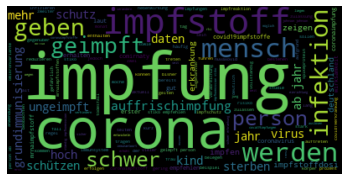

In [ ]:
import wordcloud
common_words=''
for i in a.Statement:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
counter.most_common(5)

[('impfung', 217),
 ('corona', 168),
 ('impfstoff', 126),
 ('person', 103),
 ('jahr', 74)]

In [ ]:
num_unique_words= len(counter)

Transforming our data and splitting it into train-, validation- and test data:

In [ ]:
train = a.iloc[:,0].values # Statements
test = a.iloc[:,1].values # True and Valse randomised as 0 and 1

In [ ]:
# set aside 80% of train and test data for evaluation
X_train, X_rest, y_train, y_rest = train_test_split(train, test,
    train_size=0.8, shuffle = True, random_state = 8)  #0.8

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest,  #0.5
    test_size=0.5, random_state= 8) # 0.5 x 0.2 = 0.1

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (772,)
X_test shape: (96,)
X_val shape: (97,)
y_train shape: (772,)
y_test shape: (96,)
y_val shape: (97,)


In [ ]:
# split text and  labels
train_sentences = X_train   #the model learn your data.Set of data used for learning (by the model), that is, to fit the parameters to the machine learning model
train_labels = y_train
val_sentences = X_val       # the model provide an unbiased evaluation of a model fitted on the training dataset while tuning model hyperparameters.
val_labels = y_val
test_sentences = X_test     # unbiased evaluation of a final model fitted on the training dataset.
test_label = y_test
#test_label

In [ ]:
train_sentences.shape, val_sentences.shape,test_sentences.shape 

((772,), (97,), (96,))

Tokenization of the statements: ( Doing it again here with Keras Tokenizer, as we are training our model with Keras ) 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers

tokenizer = Tokenizer(num_words= num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [ ]:
# each word has unique index
word_index = tokenizer.word_index
word_index

{'impfung': 1,
 'corona': 2,
 'impfstoff': 3,
 'person': 4,
 'geimpft': 5,
 'werden': 6,
 'mensch': 7,
 'schwer': 8,
 'ab': 9,
 'jahr': 10,
 'auffrischimpfung': 11,
 'infektion': 12,
 'empfehlen': 13,
 'hoch': 14,
 'kind': 15,
 'impfen': 16,
 'erkrankung': 17,
 'ungeimpft': 18,
 'geben': 19,
 'comirnaty': 20,
 'stiko': 21,
 'zeigen': 22,
 'virus': 23,
 'daten': 24,
 'risiko': 25,
 'sterben': 26,
 'mehr': 27,
 'schützen': 28,
 'schutz': 29,
 'studie': 30,
 'grundimmunisierung': 31,
 'deutschland': 32,
 'wirksamkeit': 33,
 'monat': 34,
 'laut': 35,
 '2': 36,
 'selten': 37,
 'coronavirus': 38,
 'covid19impfstoffe': 39,
 'moderna': 40,
 'gegenüber': 41,
 'mrnaimpfstoff': 42,
 'impfstoffdosis': 43,
 'führen': 44,
 'sollen': 45,
 'aktuell': 46,
 'erster': 47,
 'gut': 48,
 'coronaimpfung': 49,
 '30': 50,
 'erhalten': 51,
 'nebenwirkung': 52,
 'sein': 53,
 'woche': 54,
 'spikevax': 55,
 'enthalten': 56,
 'jedoch': 57,
 'nuvaxovid': 58,
 'zulassung': 59,
 '12': 60,
 'deutlich': 61,
 'körper': 6

In [ ]:
#Tokenization with Keras for the the user input
def tokenize_keras_user(input):
  input = tokenizer.texts_to_sequences(input)
  return input

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
print(train_sentences[10:15]) # normal text
print(train_sequences[10:15])  # sentences with word index

['schwangeren schwer covid19verläufe komplikationen insgesamt selten jedoch stellen schwangerschaft relevant risikofaktor schwer verläufe dar'
 'donnerstag veröffentlicht beschluss entscheiden erster senat einrichtungsbezogen impfpflicht grundgesetz vereinbar'
 'september fast geimpft tot'
 'heiko maas fordern impfpasspflicht einkaufen lebensmitteln'
 'erst zusammen empfohlen impfstoffdosis führen bereits durchgemacht infektion ansicht stiko aufbau basisimmunität']
[[317, 8, 586, 587, 242, 37, 57, 199, 130, 243, 588, 8, 318, 405], [589, 1037, 1038, 590, 47, 1039, 1040, 200, 1041, 1042], [591, 244, 5, 406], [1043, 1044, 245, 1045, 592, 1046], [201, 593, 407, 43, 44, 97, 202, 12, 1047, 21, 1048, 1049]]


In [ ]:
# sequences cannot have different lenght. We need them to have the same lenght.
# We are using padding to do so.

# max number of words in a sequence
max_lenght = 40

#First we are building the padding function for the user input:
def padding_user(input):
  input = pad_sequences(input, maxlen= max_lenght, padding ="post", truncating = "post")
  return input

In [ ]:
# Padding for the dataframe:
train_padded = pad_sequences(train_sequences, maxlen=max_lenght, padding = "post", truncating = "post")
val_padded = pad_sequences(val_sequences, maxlen= max_lenght, padding ="post", truncating = "post")
test_padded = pad_sequences(test_sequences, maxlen= max_lenght, padding ="post", truncating = "post")
train_padded.shape, val_padded.shape , test_padded.shape

((772, 40), (97, 40), (96, 40))

In [ ]:
# check if everything is correct by reversing it
# for example 1: model and instaed of model:1

# flip(key,value)
reverse_word_index = dict([(idx,word) for (word,idx) in word_index.items()])
reverse_word_index

In [ ]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [ ]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[317, 8, 586, 587, 242, 37, 57, 199, 130, 243, 588, 8, 318, 405]
schwangeren schwer covid19verläufe komplikationen insgesamt selten jedoch stellen schwangerschaft relevant risikofaktor schwer verläufe dar


Now we are building the RNN and training the model:

In [ ]:
def build(hp):


    activation = hp.Choice('activation', 
                        [
                          'relu',
                          'tanh',
                          'linear',
                          'selu',
                          'elu'
                        ])

    num_rnn_layers = hp.Int(
                        'num_rnn_layers', 
                        min_value=0,
                        max_value=12,
                        default=3)

    recurrent_dropout = hp.Float(
                        'recurrent_dropout', 
                        min_value=0.0,
                        max_value=0.99,
                        default=0.2)
    num_units = hp.Int(
                        'num_units', 
                        min_value=0,
                        max_value=64,
                        default=32)
    
    model = keras.Sequential()
    model.add(keras.layers.Embedding(num_unique_words, 32, input_length=max_lenght))
    model.add(keras.layers.LSTM(units=num_units, activation=activation, recurrent_dropout = recurrent_dropout))
    model.add(keras.layers.Dense(units=1, activation = 'sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])

    return model

In [ ]:
bayesian_opt_tuner = keras_tuner.BayesianOptimization(
    build,
    objective=keras_tuner.Objective(name='val_accuracy', direction='max'),
    max_trials=3,
    executions_per_trial=3, 
    overwrite=True)

n_epochs=20

In [ ]:
bayesian_opt_tuner.search(train_padded, train_labels,epochs=n_epochs,
     validation_data=(val_padded, val_labels),
     validation_split=0.2,verbose=2)

Trial 5 Complete [00h 01m 11s]
val_accuracy: 0.4516128897666931

Best val_accuracy So Far: 0.851612905661265
Total elapsed time: 00h 09m 08s


In [ ]:
bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model_LSTM = bayes_opt_model_best_model[0]

In [ ]:
model_LSTM

In [ ]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 32)            96672     
                                                                 
 lstm (LSTM)                 (None, 59)                21712     
                                                                 
 dense (Dense)               (None, 1)                 60        
                                                                 
Total params: 118,444
Trainable params: 118,444
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_LSTM.history

In [ ]:
predictions_LSTM = model_LSTM.predict(test_padded)
predictions_LSTM = [1 if p>0.5 else 0 for p in predictions_LSTM]

In [ ]:
#model_LSTM.save('models/LSTM_Fakenews_Model_Final.h5')

In [ ]:
#new_model = load_model('models/LSTM_Fakenews_Model_2.h5')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_LSTM))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, 
predictions_LSTM))

              precision    recall  f1-score   support

       False       0.87      0.91      0.89        44
        True       0.92      0.88      0.90        52

    accuracy                           0.90        96
   macro avg       0.89      0.90      0.90        96
weighted avg       0.90      0.90      0.90        96

[[40  4]
 [ 6 46]]


Connecting to the Anvil Web App:

In [ ]:
from fastai.text.all import load_learner
import anvil.server

In [ ]:
anvil.server.connect("TKEAZQWDWYAZVEHF4EW3TN5F-XGIH7W2J3XZSQW46")

In [ ]:
@anvil.server.callable
def predict_app(input):
  input = remove_punctuation_user(input)   #the different kinds of preprocessing steps also have to be applied to our user's input sentence - if not, the machine learning model will not understand the sentence and will not be able to categorize it into True or False
  input = preprocess_user(input)
  input = tokenize_user(input)
  input = remove_stopwords_user(input)
  input = lemmatize_user(input)
  input = tokenize_keras_user(input)
  input = padding_user(input)
  input = [input]
  prediction = model_LSTM.predict(input)
  correct = "The statement is correct"
  false = "The statement is false"
  if prediction == 0:
    preds = correct
  else:
    preds = false
  return preds

In [ ]:
#For demo:
#URL to our application: https://XGIH7W2J3XZSQW46.anvil.app/3KGXEUN7XDU6WSMTXUMIEWAZ
  #Correct statement #1: "mRNA-Impfstoffe schützen vor schweren Verläufen."
  #Correct statement #2: "Die COVID-19-Impfstoffe schützen gut vor COVID-19."
  #Correct statement #3: "Es sind keine Mikrochips in Impfstoffen enthalten."
  #False statement #1: "Von Coronaimpfstoffen geht eine hohe Todesgefahr aus."
  #False statement #2: "Chloroquin kann das Covid-Virus abtöten. Impfungen sind unnötig."
  #False statement #3: "Personen mit besonders schwerem Verlauf weisen viele Antikörper gegen SARS-CoV-2 auf."